# Notes:

You are banned from using loops (`for` or `while` or any other) for this entire workshop!

You shouldn't be using loops almost ever with pandas in any case, so break out of the habit now.

## 1. DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

**2.** Select only the rows where visits are 3 or more. Which types of animals are these?

**3.** Select the rows where visists are 3 and the animal is a cat

**4.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

**5.** Calculate the mean age for each different animal in `df`.

**6.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.



In [20]:
import pandas as pd 
import numpy as np
# dictionary with list object in values 
data = {"animal": ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        "age": [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        "visits": [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        "priority": ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
  
# creating a Dataframe object  
df 

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,0.0,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,0.0,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [21]:
df = pd.DataFrame(data, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']) 
df 

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [22]:
filt1 = (df['visits'] >= 3) & (df['animal']=="cat")
df[filt1].head()

,animal,age,visits,priority
b,cat,3.0,3,yes
f,cat,2.0,3,no


In [10]:
df.agg({'visits': 'sum'}).round(0)

visits    19
dtype: int64

In [23]:
df = df.fillna(0)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,0.0,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,0.0,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [24]:
df = df.fillna(0)
avg_td = df.groupby('animal').agg({'age':'mean'})
avg_td.head()

,age
animal,
cat,1.875
dog,3.750
snake,2.500


In [25]:
df.loc['k'] = ['sheep', 3, 4,'yes']
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,0.0,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,0.0,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [26]:
df.drop(index='k')

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,0.0,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,0.0,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


# 2.1 Shifty problem

You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

### Hint: use the `shift()` method

In [33]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df = df[ # filter df with a boolean array
    df.A.ne(df.A.shift()) # find out if elements are different from the row above
]
df

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


# 2.2 columns sum min

Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? Return that column's label.

In [33]:
import numpy as np
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
total = df.sum(axis=0)
total.loc[(total == total.min())]

a    1.374294
dtype: float64

# 2.3 Duplicates

How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

**hint:** There's a method for to find duplicate rows for you

In [34]:
df = pd.DataFrame({'one': pd.Series([1., 1, 1]),
                   'two': pd.Series([1., 2., 1])})
df.drop_duplicates()

,one,two
0,1.0,1.0
1,1.0,2.0


# 2.4 Group Values

A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.  You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [35]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
df

,grps,vals
0,a,12
1,a,345
2,a,3
3,b,1
4,b,45
5,c,14
6,a,4
7,a,52
8,b,54
9,c,23


In [42]:
df.groupby('grps')['vals'].nlargest(3).sum(level=0)

grps
a    409
b    156
c    345
Name: vals, dtype: int64

# 3. Cleaning Data

### Making a DataFrame easier to work with

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```

Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```

**1.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [69]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [70]:

df = df.interpolate()
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


# 3.2 column splitting

The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to make two new columns `From` and `To` to your dataframe.

In [71]:
df[['From', 'To']] = df['From_To'].str.split('_', 1, expand=True)
df = df.drop('From_To',axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),LoNDon,paris
1,10055.0,[],<Air France> (12),MAdrid,miLAN
2,10065.0,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075.0,[13],12. Air France,Budapest,PaRis
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,londOn


# 3.3 Clean Text

Make the text in your dataframe:

- From and To columns should be lowercase with only first letter capitalized

- In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [74]:

df['From'] = df['From'].str.capitalize()
df['To'] = df['To'].str.capitalize()
df['Airline'] = df['Airline'].str.replace('[\s0-9.()<>!"]','')
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM,London,Paris
1,10055.0,[],AirFrance,Madrid,Milan
2,10065.0,"[24, 43, 87]",BritishAirways,London,Stockholm
3,10075.0,[13],AirFrance,Budapest,Paris
4,10085.0,"[67, 32]",SwissAir,Brussels,London


# Exercise 4.1: Column Splitting

Given the unemployment data in `data/country_total.csv`, split the `month` column into two new columns: a `year` column and a `month` column, both integers

In [45]:
import pandas as pd
df = pd.read_csv("data/country_total.csv")
df['month'] = df['month'].astype(str)
df[['year','month1']] = df['month'].str.split('.',expand=True)
df

,country,seasonality,month,unemployment,unemployment_rate,year,month1
0,at,nsa,1993.01,171000,4.5,1993,01
1,at,nsa,1993.02,175000,4.6,1993,02
2,at,nsa,1993.03,166000,4.4,1993,03
3,at,nsa,1993.04,157000,4.1,1993,04
4,at,nsa,1993.05,147000,3.9,1993,05
...,...,...,...,...,...,...,...
20791,uk,trend,2010.06,2429000,7.7,2010,06
20792,uk,trend,2010.07,2422000,7.7,2010,07
20793,uk,trend,2010.08,2429000,7.7,2010,08
20794,uk,trend,2010.09,2447000,7.8,2010,09


# 4.2 Group Statistics

Given the unemployment data in `data/country_sex_age.csv`, give the average unemployment rate for:

- Each gender
- Each Age Group
- Both Together

**HINT:** The `seasonality` column makes it such that the data is repeated for each method of calculating unemployment (`nsa`, `trend`, etc.). Can you ignore this and group over it? Or should you take the average for each?

In [46]:

df_stats = pd.read_csv("data/country_sex_age.csv")
df_stats.groupby(['sex','seasonality']).agg({'unemployment_rate' : ['mean']})

unemployment_rate
                             mean
sex seasonality                  
f   nsa                 13.179216
    sa                  12.908743
    trend               12.862163
m   nsa                 11.708432
    sa                  11.662290
    trend               11.643015

In [47]:
df_stats.groupby(['age_group','seasonality']).agg({'unemployment_rate' : ['mean']})

unemployment_rate
                                   mean
age_group seasonality                  
y25-74    nsa                  6.870746
          sa                   6.918446
          trend                6.926319
y_lt25    nsa                 18.016902
          sa                  17.690707
          trend               17.617224

In [48]:
df_stats.groupby(['sex','age_group','seasonality']).agg({'unemployment_rate' : ['mean']})

unemployment_rate
                                       mean
sex age_group seasonality                  
f   y25-74    nsa                  7.539839
              sa                   7.579982
              trend                7.579934
    y_lt25    nsa                 18.818593
              sa                  18.323837
              trend               18.231025
m   y25-74    nsa                  6.201653
              sa                   6.256909
              trend                6.272703
    y_lt25    nsa                 17.215211
              sa                  17.067671
              trend               17.013327

# 4.3 Estimating group size

Given that we have the unemployment **rate** as a % of total population, and the number of total unemployed, we can estimate the total population.

Give an estimate of the total population for men and women in each age group.

Does this change depending on the unemployment seasonality calculation method?

In [49]:
df_stats['population']= (df_stats.unemployment) / (df_stats.unemployment_rate / 100)
df_stats.groupby(['sex','age_group','seasonality']).agg({'population' : ['mean']})

population
                                   mean
sex age_group seasonality              
f   y25-74    nsa          3.006779e+06
              sa           3.360649e+06
              trend        3.289520e+06
    y_lt25    nsa          5.270112e+05
              sa           5.876348e+05
              trend        5.848969e+05
m   y25-74    nsa          4.110194e+06
              sa           4.533201e+06
              trend        4.423824e+06
    y_lt25    nsa          6.354751e+05
              sa           6.867673e+05
              trend        6.809973e+05

# 5.1 Tennis

In `data/tennis.csv` you have games that Roger Federer played against various opponents. Questions:

1. How many games did Federer win?

2. What is Federer's win/loss ratio?

3. Who were Federer's top 5 opponents?

In [55]:
df = pd.read_csv('data/tennis.csv')
print(len(df))
print(df['player1 name'].unique())
df['player1 name'].unique() in df['player2 name'].unique()

1179
['Roger Federer']


False

In [56]:

df.winner.value_counts().head(1)
#  Answer 1: Federer won 972 matches

Roger Federer    972
Name: winner, dtype: int64

In [57]:
wins = df.winner.value_counts()[0]
losses = len(df.winner) - wins
print(f"2. Federer's win/loss ratio is {wins}/{losses} or {wins/losses:0.2f}")

2. Federer's win/loss ratio is 972/207 or 4.70


In [58]:
df.winner.value_counts().head(6)[1:]
# Federer's top five opponents that beat him were:

Rafael Nadal        18
Novak Djokovic      13
Andy Murray         10
Lleyton Hewitt       8
David Nalbandian     8
Name: winner, dtype: int64

# 5.2 Over time

1. What was Federer's best year? In terms of money, and then in terms of number of wins

2. Did Federer get better or worse over time?

In [59]:
df['tournament prize money'] = df['tournament prize money'].replace('[a-zA-Z\$,]', '', regex=True).replace('',0).astype(float)
df.loc[(df.winner == 'Roger Federer') & (df['tournament round'] == 'F')].groupby(by='year')['tournament prize money'].sum().sort_values(ascending=False)

year
2007    7245735.0
2006    7221635.0
2004    6229377.0
2005    4733250.0
2010    4561045.0
2012    3971120.0
2003    3026502.0
2009    2938500.0
2011    2579000.0
2008    1819800.0
2002     540600.0
2001      54000.0
1999      14400.0
Name: tournament prize money, dtype: float64

In [60]:
df.loc[(df.winner == 'Roger Federer') & (df['tournament round'] == 'F')].groupby(by='year').count().tournament

year
1999     1
2001     1
2002     3
2003     7
2004    11
2005    11
2006    12
2007     8
2008     4
2009     4
2010     5
2011     4
2012     6
Name: tournament, dtype: int64

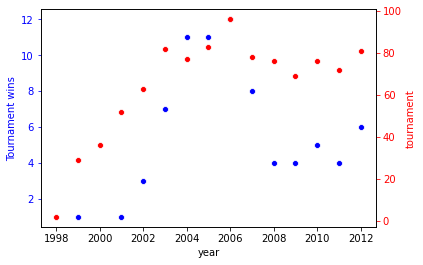

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
df1 = df.loc[(df.winner == 'Roger Federer') & (df['tournament round'] == 'F')].groupby(by='year').count().tournament
df2 = df.loc[(df.winner == 'Roger Federer')].groupby(by='year').count().tournament
ax = sns.scatterplot(x=df1.index, y=df1,legend=False,color='blue')
ax.set_ylabel('Tournament wins',color='blue')
ax.tick_params(axis='y', colors='blue')
ax2 = ax.twinx()
ax2.set_ylabel('Match wins',color='red')
ax2.tick_params(axis='y', colors='red')
sns.scatterplot(x=df2.index, y=df2,label='match wins', color='red',ax=ax2,legend=False)

# 5.3 Total money won

In the data, you'll find the `tournament round`, one value of which, `F` indicates the final.

Assuming Federer wins the money in the `tournament prize money` if he wins a final in a tournament, how much money has Federer made in tournaments in this dataset?

In [62]:
df = pd.read_csv('data/tennis.csv')
df['tournament prize money'] = df['tournament prize money'].replace('[a-zA-Z\$,]', '', regex=True).replace('',0).astype(float)
df['tournament prize money'].loc[(df['tournament round'] == 'F') & (df['winner'] == 'Roger Federer')].sum()
# Federer would have won an astronomical amount of money

44934964.0